In [1]:
#@markdown #USCMS Diveristy Data: Gender Count per Age Group
#@markdown Count gender per age group for various periods of years. 

#@markdown ### Import `python` libraries

import os, json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import ipywidgets as widgets

from google.colab import drive
drive.mount( '/content/drive' )

%cd /content/drive/My Drive/Physics Research/CMS/Analysis/USCMS-diversity-analysis-main/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Physics Research/CMS/Analysis/USCMS-diversity-analysis-main


In [2]:
#@markdown ### Select and Load in the Relevant `json` Files
#@markdown Choose the years to consolidate
people_stats = [ option for option in os.listdir( "./Data/" ) if "people_stats" in option ]
people_stats_years = [ name.split(".")[0].split("_")[2][:4] for name in people_stats ]
yearlist = widgets.SelectMultiple( options = sorted(people_stats_years) )
yearlist

SelectMultiple(options=('1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004'…

In [3]:
#@markdown Load in the `json` files

region_key = {
    "CERN":["CERN","CERN-BASED"],
    "CERN OTHER":["AUSTRIA","BELGIUM","BULGARIA","FINLAND","GREECE","HUNGARY","POLAND","PORTUGAL","SERBIA","SPAIN"],
    "FRANCE": ["FRANCE"],
    "GERMANY": ["GERMANY"],
    "ITALY": ["ITALY"],
    "OTHER A":["CHINA","INDIA","IRAN","KOREA","MALAYSIA","NEW ZEALAND","PAKISTAN","SRI LANKA","TAIWAN","THAILAND"],
    "OTHER B":["BAHRAIN","BRAZIL","COLOMBIA","CROATIA","CYPRUS","ECUADOR","EGYPT","ESTONIA","IRELAND","KUWAIT","LEBANON","LATVIA","LITHUANIA","MEXICO","MONTENEGRO","OMAN","QATAR","SAUDI ARABIA","TURKEY","UKRAINE"],
    "OTHER C":[],
    "RDMS":["RUSSIA","ARMENIA","BELARUS","GEORGIA","UZBEKISTAN"],
    "SWITZERLAND": ["SWITZERLAND"],
    "UNITED KINGDOM": ["UNITED KINGDOM"],
    "USCMS": ["USA"]
}

json_files = {
    "people_new": json.load( open( "Data/people_new.json" ) ),
    "institutes_new": json.load( open( "Data/institutes_new.json" ) ),
    "people_stats": { year: json.load( open( "Data/people_stats_{}1231.json".format( year ) ) ) for year in yearlist.value }
}

institute_list = np.array( [ list( institute.values() ) for institute in json_files[ "institutes_new" ] ] )

id_info = {}
for person in json_files[ "people_new" ]:
  id_info[ str( person[ "cmsId" ] ) ] = { 
    "BIRTHYEAR": person[ "birthYear" ],
    "GENDER": person[ "gender" ]   
  }

data = {
    year: {} for year in yearlist.value
}

for year in yearlist.value:
  for person in json_files[ "people_stats" ][ year ]:
    data[ year ][ str( person[ "cms_id" ] ) ] = {
        "ACTIVITY": person[ "activity_cms" ],
        "INSTITUTE": person[ "inst_code" ],
        "AUTHOR": person[ "is_author" ],
        "STATUS": person[ "status_cms" ],
        "GENDER": id_info[ str( person[ "cms_id" ] ) ][ "GENDER" ],
        "BIRTHYEAR": id_info[ str( person[ "cms_id" ] ) ][ "BIRTHYEAR" ]
    }
  print( "Adding regions for {}".format( year ) )
  for cms_id in data[ year ]:
    if data[ year ][ cms_id ][ "INSTITUTE" ] == None: 
      data[ year ][ cms_id ][ "REGION" ] = "OTHER C"
      continue
    this_index = np.argwhere( institute_list[:,0] == data[ year ][ cms_id ][ "INSTITUTE" ] )[0,0]
    this_country = institute_list[ this_index, 1 ].upper()
    if data[ year ][ cms_id ][ "INSTITUTE" ].upper() in [ "CERN", "CERN-BASED" ]:
      this_country = "CERN"
    has_region = False
    for region in region_key.keys():
      if this_country in region_key[ region ]:
        data[ year ][ cms_id ][ "REGION" ] = region
        has_region = True
        continue
    if has_region == False:
      data[ year ][ cms_id ][ "REGION" ] = "OTHER C"
      if this_country not in region_key["OTHER C"]: 
        print( ">> Adding {} to Other C".format( this_country ) )
        region_key["OTHER C"].append( this_country )

Adding regions for 1995
>> Adding CZECH REPUBLIC to Other C
>> Adding ZZ to Other C
>> Adding JAPAN to Other C
>> Adding SLOVAK REPUBLIC to Other C
Adding regions for 1996
>> Adding NETHERLANDS to Other C
Adding regions for 1997
>> Adding NORWAY to Other C
Adding regions for 1998
Adding regions for 1999
>> Adding ROMANIA to Other C
Adding regions for 2000
Adding regions for 2001
Adding regions for 2002
>> Adding CANADA to Other C
Adding regions for 2003
Adding regions for 2004
Adding regions for 2005
Adding regions for 2006
Adding regions for 2007
Adding regions for 2008
Adding regions for 2009
>> Adding TUNISIA to Other C
Adding regions for 2010
Adding regions for 2011
>> Adding PHILIPPINES to Other C
Adding regions for 2012
Adding regions for 2013
Adding regions for 2014
>> Adding SINGAPORE to Other C
Adding regions for 2015
Adding regions for 2016
Adding regions for 2017
Adding regions for 2018
Adding regions for 2019
Adding regions for 2020
>> Adding JORDAN to Other C
Adding region

In [4]:
#@markdown Choose a CMS Status to report

status_options = []

for year in yearlist.value:
  for person in json_files[ "people_stats" ][ year ]:
    if person[ "status_cms" ] not in status_options:
      if person[ "status_cms" ] != None and person[ "status_cms" ] != "":
        status_options.append( person[ "status_cms" ] )

status = widgets.SelectMultiple( options = sorted( status_options ), value = [ "CMS", "CMSAFFILIATE", "CMSASSOC", "CMSEMERITUS", "CMSEXTENDED" ] )
status

SelectMultiple(index=(1, 3, 4, 5, 6), options=('CERN', 'CMS', 'CMS iCMSfor9981_01/01/2019-Author:True', 'CMSAF…

In [5]:
#@markdown Select authorship status to report:
author_legend = {
    "AUTHORS": [ True ],
    "ALL MEMBERS": [ True, False, None ],
    "NON-AUTHORS": [ False ],
    "REPORTED MEMBERS": [ True, False ],
    "UNREPORTED MEMBERS": [ None ],
    "AUTHORS and UNREPORTED": [ True, None ],
    "NON-AUTHORS and UNREPORTED": [ False, None ]
}
author = widgets.Select( options = author_legend.keys(), value = "AUTHORS" )
author

Select(options=('AUTHORS', 'ALL MEMBERS', 'NON-AUTHORS', 'REPORTED MEMBERS', 'UNREPORTED MEMBERS', 'AUTHORS an…

In [6]:
#@markdown Select regions to report
regions = widgets.SelectMultiple( options = sorted( region_key.keys() ) )
regions 

SelectMultiple(options=('CERN', 'CERN OTHER', 'FRANCE', 'GERMANY', 'ITALY', 'OTHER A', 'OTHER B', 'OTHER C', '…

In [7]:
#@markdown Count the genders for each age group by year range

year_bins = list( yearlist.value[0::len(yearlist.value)//3] )
this_year = 2021

year_ranges = {
    "{}-{}".format( int( year_bins[0] ), int( year_bins[1] ) - 1 ): {
        "Male": [],
        "Female": []
    },
    "{}-{}".format( int( year_bins[1] ), int( year_bins[2] ) - 1 ): {
        "Male": [],
        "Female": []
    },
    "{}-{}".format( int( year_bins[2] ), int( yearlist.value[-1] ) ): {
        "Male": [],
        "Female": []
    }
}

for year in yearlist.value:
  for person in data[ year ]:
    if data[ year ][ person ][ "BIRTHYEAR" ] != None:
      if data[ year ][ person ][ "REGION" ] not in regions.value: continue
      age = int( year ) - int( data[ year ][ person ][ "BIRTHYEAR" ] )
      for year_range in year_ranges:
        lower = int( year_range.split("-")[0] )
        upper = int( year_range.split("-")[1] )
        if int(year) >= lower and int(year) <= upper:
          if data[ year ][ person ][ "GENDER" ] == "M":
            year_ranges[ year_range ][ "Male" ].append( age )
          elif data[ year ][ person ][ "GENDER" ] == "F":
            year_ranges[ year_range ][ "Female" ].append( age )
        


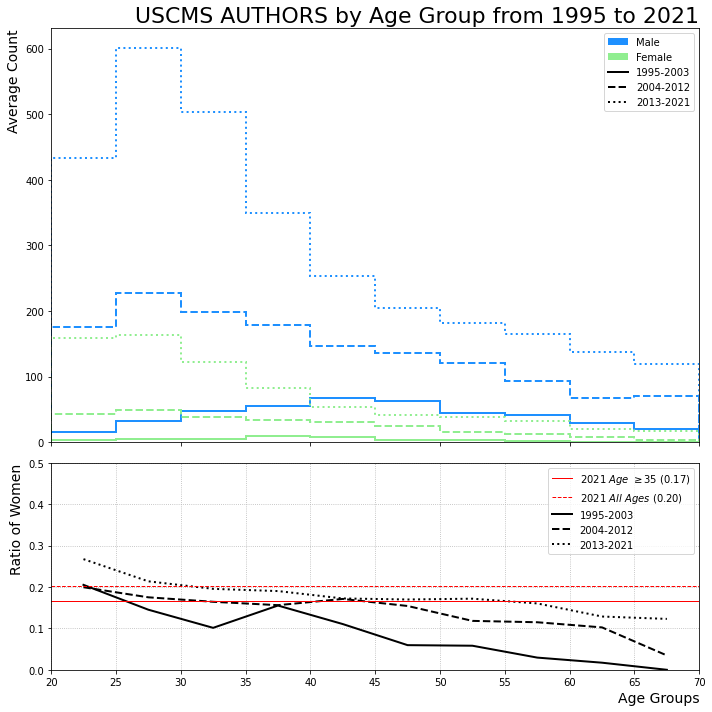

In [8]:
#@markdown Plot the Gender Counts by Age Group for Year Ranges

hists = {
    year_range: {
        "Male": None, "Female": None
    } for year_range in year_ranges.keys()
}

age_bins = np.linspace(20,70,11)
linestyles = [ "-", "--", ":" ]
histtypes = [ "step", "step", "step" ]
alphas = [ 1, 1, 1 ]
age_split = 35
region_tag = "Custom"

figure, subplots = plt.subplots( 2, 1, gridspec_kw= { "height_ratios": [2,1] }, figsize = (10,10) )

for i, year_range in enumerate( year_ranges.keys() ):
  hists[ year_range ][ "Male" ] = subplots[0].hist( 
    np.clip( year_ranges[ year_range ][ "Male" ], age_bins[0], 100 ), 
    bins = age_bins, weights = np.full( 
    len( year_ranges[ year_range ][ "Male" ] ),  
    1. / ( float( year_range.split("-")[-1] ) - float( year_range.split("-")[0] ) )
    ),
    histtype = histtypes[i], linestyle = linestyles[i], color = "dodgerblue", alpha = alphas[i], lw = 2
  )
  hists[ year_range ][ "Female" ] = subplots[0].hist( 
    np.clip( year_ranges[ year_range ][ "Female" ], age_bins[0], 100 ),
    bins = age_bins, weights = np.full( 
        len( year_ranges[ year_range ][ "Female" ] ),  
        1. / ( float( year_range.split("-")[-1] ) - float( year_range.split("-")[0] ) )
        ),
    histtype = histtypes[i], linestyle = linestyles[i], color = "lightgreen", alpha = alphas[i], lw = 2
  )

for i, year_range in enumerate( year_ranges.keys() ):
  subplots[1].plot(
      np.array( hists[ year_range ][ "Female" ][1][:-1] ) + 2.5, 
      np.array( hists[ year_range ][ "Female" ][0] ) /  ( np.array( hists[ year_range ][ "Male" ][0] ) + np.array( hists[ year_range ][ "Female" ][0] ) ),
      label = year_range,
      ls = linestyles[i], color = "k", lw = 2
      )

count = {
    "Female": {
        "High": 0, "All": 0
    },
    "Male": {
        "High": 0, "All": 0
    }
}

for person in data[yearlist.value[-1]].values():
  if person["BIRTHYEAR"] != None:
    if person[ "GENDER" ] == "F": 
      count[ "Female" ][ "All" ] += 1
      if int( yearlist.value[-1] ) - int( person[ "BIRTHYEAR" ] ) >= age_split: count[ "Female" ][ "High" ] += 1
    elif person[ "GENDER" ] == "M": 
      count[ "Male" ][ "All" ] += 1
      if int( yearlist.value[-1] ) - int( person[ "BIRTHYEAR" ] ) >= age_split: count[ "Male" ][ "High" ] += 1

average = {
    "High": float( count[ "Female" ][ "High" ] ) / float( count[ "Female" ][ "High" ] + count[ "Male" ][ "High" ] ),
    "All": float( count[ "Female" ][ "All" ] ) / float( count[ "Female" ][ "All" ] + count[ "Male" ][ "All" ] )
}

subplots[1].axhline( y = average["High"], color = "r", lw = 1, ls = "-" )
subplots[1].axhline( y = average["All"], color = "r", lw = 1, ls = "--" )

custom_legend_0 = [
  Patch(facecolor = "dodgerblue", label = "Male" ),
  Patch(facecolor = "lightgreen", label = "Female" ),
]

custom_legend_1 = [
  Line2D( [0], [0], color = "r", lw = 1, ls = "-", label = r"${}\ Age\ \geq{}\ ({:.2f})$".format( yearlist.value[-1], age_split, average[ "High" ] ) ),
  Line2D( [0], [0], color = "r", lw = 1, ls = "--", label = r"${}\ All\ Ages\ ({:.2f})$".format( yearlist.value[-1], average["All"] ) ) 
]

for i, year_range in enumerate( year_ranges.keys() ):
  custom_legend_0.append( Line2D( [0], [0], color = "k", lw = 2, ls = linestyles[i], label = year_range ) )
  custom_legend_1.append( Line2D( [0], [0], color = "k", lw = 2, ls = linestyles[i], label = year_range ) )

if list( regions.value ) == ["USCMS"]:
  subplots[0].set_title( 
      "USCMS {} by Age Group from {} to {}".format( author.value, yearlist.value[0], yearlist.value[-1] ),
      x = 1.0, ha = "right", fontsize = 22
       )
  region_tag = "USCMS"
elif len( regions.value ) == len( region_key.keys() ):
  subplots[0].set_title( 
      "CMS {} by Age Group from {} to {}".format( author.value, yearlist.value[0], yearlist.value[-1] ),
      x = 1.0, ha = "right", fontsize = 22
       )
  region_tag = "CMS"
else:
  subplots[0].set_title( 
      "Custom {} by Age Group from {} to {}".format( author.value, yearlist.value[0], yearlist.value[-1] ),
      x = 1.0, ha = "right", fontsize = 22
       )

subplots[0].axes.get_xaxis().set_ticklabels([])
subplots[0].set_xlim(age_bins[0],age_bins[-1])
subplots[1].set_xlim(age_bins[0],age_bins[-1])
subplots[1].set_xticks(age_bins)
subplots[1].set_xlabel( "Age Groups", x = 1.0, ha = "right", fontsize = 14 )
subplots[0].set_ylabel( "Average Count", y = 1.0, ha = "right", fontsize = 14 )
subplots[1].set_ylabel( "Ratio of Women", y = 1.0, ha = "right", fontsize = 14 )
subplots[1].set_ylim(0,0.5)
subplots[1].grid( linestyle = ":" )
subplots[0].legend( handles = custom_legend_0 )
subplots[1].legend( handles = custom_legend_1 )

plt.tight_layout()
if not os.path.exists( os.getcwd() + "/Plots/ ") != True: os.makedirs( os.getcwd() + "/Plots/" )
plt.savefig( "./Plots/{} Gender by Age {} {}-{}.png".format( region_tag, author.value, yearlist.value[0], yearlist.value[-1] ), transparent = True )
plt.show()
plt.close()

## Plot the gender ratio per age group per CMS cohort

In [9]:
#@markdown Choose Regions to Report
#@markdown Select regions to report
regions = widgets.SelectMultiple( options = sorted( region_key.keys() ) )
regions 

SelectMultiple(options=('CERN', 'CERN OTHER', 'FRANCE', 'GERMANY', 'ITALY', 'OTHER A', 'OTHER B', 'OTHER C', '…

In [10]:
#@markdown Choose how many ages are considered for each group
nAges = widgets.SelectionSlider( options = np.linspace(1,10,10), value = 5.0 )
nAges

SelectionSlider(index=4, options=(1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0), value=5.0)

In [11]:
#@markdown Choose a range of ages to report
ageRange = widgets.SelectionRangeSlider( options = np.linspace( 18, 100, 83 ), value = [ 20, 70 ]  )
ageRange

SelectionRangeSlider(index=(2, 52), options=(18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,…

In [12]:
#@markdown Choose a range of birth years to report
birthRange = widgets.SelectionRangeSlider( options = np.linspace( 1900, 2020, 121 ), value = [ 1935, 2000 ] )
birthRange

SelectionRangeSlider(index=(35, 100), options=(1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0,…

In [16]:
#@markdown Count the gender for each age group per birth year cohort

cms_years = np.linspace( int( yearlist.value[0] ), int( yearlist.value[-1] ), int( yearlist.value[-1] ) - int( yearlist.value[0]) + 1 )
bins_birth = np.linspace( birthRange.value[0], birthRange.value[-1], int( birthRange.value[-1] - birthRange.value[0] ) + 1 )[::int(nAges.value)]
bins_age = np.linspace( ageRange.value[0], ageRange.value[-1], int( ageRange.value[-1] - ageRange.value[0] ) + 1 )[::int(nAges.value)]

cohort = {
    int( birthyear ): {
        int( age_bin ): {
            "M": 0, "F": 0, "T": 0
        } for age_bin in bins_age
    } for birthyear in bins_birth
}

for cms_year in cms_years:
  if cms_year == None: continue
  cms_year = str( int( cms_year ) )
  for person in data[ cms_year ]:
    birthyear = data[ cms_year ][ person ][ "BIRTHYEAR" ]
    gender = data[ cms_year ][ person ][ "GENDER" ]
    status_ = data[ cms_year ][ person ][ "STATUS" ]
    region = data[ cms_year ][ person ][ "REGION"]
    if birthyear in [ None ] or gender in [ None, "", "None" ]: continue
    if status_ not in status.value or region not in regions.value: continue
    birthyear = int( birthyear )
    age = int( cms_year ) - int( birthyear )
    bin_birth, bin_age = None, None
    for x, bin_x in enumerate( bins_birth ):
      if bin_x == bins_birth[ -1 ]: 
        if birthyear >= bin_x and birthyear <= bins_birth[ -1 ]: bin_birth = bin_x
      else:
        if birthyear >= bin_x and birthyear < bins_birth[ x + 1 ]: bin_birth = bin_x

    for y, bin_y in enumerate( bins_age ):
      if bin_y == bins_age[ -1 ]:
        if age >= bin_y and age <= bins_age[ -1 ]: bin_age = bin_y
      else:
        if age >= bin_y and age < bins_age[ y + 1 ]: bin_age = bin_y

    if bin_birth == None or bin_age == None: continue
    cohort[ int( bin_birth ) ][ int( bin_age ) ][ gender ] += 1
    cohort[ int( bin_birth ) ][ int( bin_age ) ][ "T" ] += 1


In [17]:
#@markdown Calculate the ratio of women for each year

def ratio_err(n,k):
  return np.sqrt( ( (k+1)*(k+2) ) / ( (n+2)*(n+3) ) ) - ( (k+1)**2 / (n+2)**2 )

for year in cohort:
  for age in cohort[ year ]:
    if cohort[ year ][ age ][ "T" ] == 0: continue
    N_F, N_T = float( cohort[ year ][ age ][ "F" ] ), float( cohort[ year ][ age ][ "T" ] )
    cohort[ year ][ age ][ "Ratio F" ] = N_F / N_T 
    cohort[ year ][ age ][ "Ratio F UNC" ] = ratio_err( N_T, N_F )

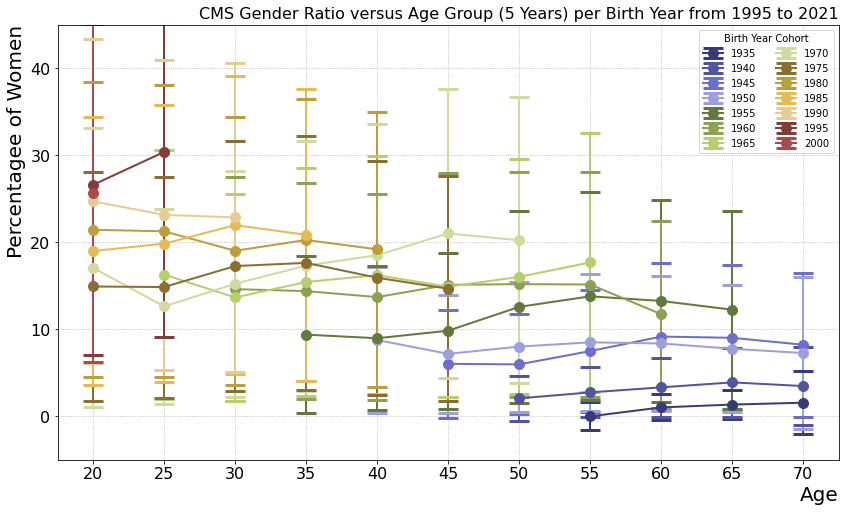

In [18]:
#@markdown Plot the percentage of women versus the age per birth year cohort.  This plot
#@markdown can be interpreted by adding the `Birth Year` of the cohort to the `Age` and 
#@markdown that will give you the year from which the CMS data was taken.  Since the
#@markdown the data is grouped in periods of `N` years, you get the fraction between 
#@markdown `Year` to `Year + N` further subdivided into age groups from `Age` to `Age + N`.
#@markdown As an example, if you take `Birth Year Cohort = 1940` and look at the 
#@markdown `Age = 65`, for `N=5` you would have the fraction of `[65,70)` year olds
#@markdown from `[2005,2010)`.

plt.figure( figsize = ( 14, 8 ) )

for i, year in enumerate( cohort ):
  plot_x = [ x for x in list( cohort[ year ].keys() ) if cohort[ year ][ x ][ "T" ] > 0 ]
  plot_y = [ 100. * cohort[ year ][ x ][ "Ratio F" ] for x in list( cohort[ year ].keys() ) if cohort[ year ][ x ][ "T" ] > 0 ]
  plot_std = [ 100. * cohort[ year ][ x ][ "Ratio F UNC" ] for x in list( cohort[ year ].keys() ) if cohort[ year ][ x ][ "T" ] > 0 ]
  plt.errorbar( 
      plot_x, plot_y, yerr = plot_std,label = year,
      lw = 2, marker = "o", ms = 10, capsize = 10, capthick = 3,
      color = plt.get_cmap( "tab20b" ).colors[i]
      )

if list( regions.value ) == [ "USCMS" ]:
  plt.title( "USCMS Gender Ratio versus Age Group ({} Years) per Birth Year from {} to {}".format( int( nAges.value ), yearlist.value[0], yearlist.value[-1] ), x = 1.0, ha = "right", fontsize = 16 )
  plt.ylim( -5, 85 )
if list( regions.value ) == sorted( region_key.keys() ):
  plt.title( "CMS Gender Ratio versus Age Group ({} Years) per Birth Year from {} to {}".format( int( nAges.value ), yearlist.value[0], yearlist.value[-1] ), x = 1.0, ha = "right", fontsize = 16 )
  plt.ylim( -5, 45 )

plt.xlabel( "Age", x = 1.0, ha = "right", fontsize = 20 )
plt.xticks( bins_age, size = 16 )
plt.ylabel( "Percentagee of Women", y = 1.0, ha = "right", fontsize = 20 )
plt.yticks( size = 16 )
plt.grid( which = "major", linestyle = ":" )
plt.legend( loc = "best", title = "Birth Year Cohort", ncol = 2 )
plt.show()
plt.close()